# MLDS Workshop: Logistic Regression, Convulutions, PCA

Welcome to our second dive into CIFAR-10! Today, we will be bringing a lot of things together, to help you tackle the CIFAR-10 challenge. Let's start off with a review of K-nearest neighbors, which is what we talked about last time. Today, we will use skikit-learn, one of the most popular Python libraries for Machine Learning in Python. This was created by David Cournapeau as part of Google Summer of Code. For illustrative purposes, we will be using the iris dataset, which is a fairly small dataset about flowers which comes bundled in with scikit-learn.

**Note:** A bunch of the code below is taken from the scikit-learn website and not authored by us. We do not claim ownership.

In [32]:
# Useful for seeing the matplotlib graphs within the notebook
%matplotlib inline

# Installing scikit-learn if you don't already have it
!pip install scikit-learn

# Some libraries that we will be using today
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from scipy import misc
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

Let's start off by getting the data. Again, we will use iris dataset. From scikit's website,

"This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray
The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width."

However, we will only use sepal length and sepal width, because 2-D plots are easier to understand.

In [2]:
# import some data to play with
iris = datasets.load_iris()

# In Machine Learning community, what we know is often written as "X" and
# what we are trying to predict is often wrtiten as "y"
X = iris.data[:, :2]
y = iris.target

Let's see what the look like

In [3]:
X # We are using 2 features

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

In [4]:
y # We have 3 kinds of flowers

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Again, let us start with a brief review of k-nearest neighbors. It is the strategy where we look at "k" neighbors closest to us, and choose the label which is most frequent among them. Last time, someone asked a question about ties. Let's illustrate one way to deal with them. Instead of having the top k neighbors simply vote, we can weight their votes by distance from our point. This is what this first set of plots is showing.

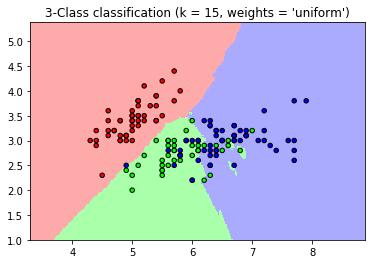

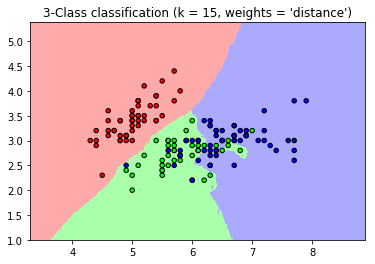

In [5]:
n_neighbors = 15  # We will do k-nearest neighbors, with k=15

# Next 3 lines are for matplotlib magic
h = .02  # step size in the mesh
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']: # Uniform = just voting, distance = weigh by distance
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights) # This is usually how you use sklearn models
    clf.fit(X, y) # Training on our data. X could have had many more columns and have been fine

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h)) # Create a 2-D mesh (don't worry too much about this)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Predict for each point in our mesh

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

There is a lot of matplotlib magic up there, but really, the interesting lines of code are:

```
> clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights) # This is usually how you use sklearn models
> clf.fit(X, y) # Training on our data. X could have had many more columns and have been fine
> Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # Predict for each point in our mesh
```

Let's see what happens when we try to switch around the 'k' in k-nearest-neighbors.

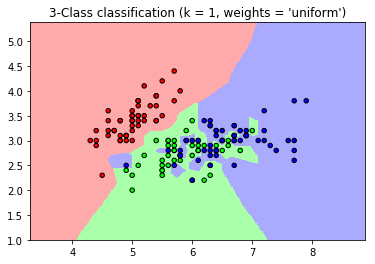

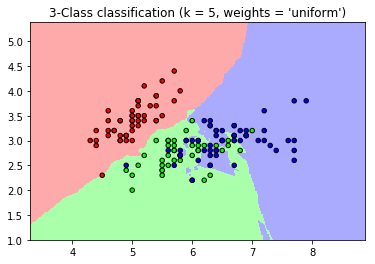

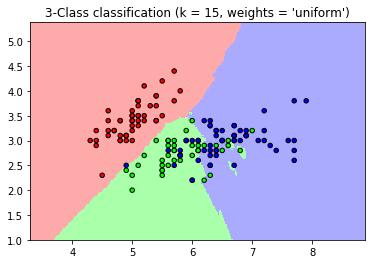

In [6]:
weights='uniform'
for n_neighbors in [1, 5, 15]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

Notice how there are fewer holes in our regions as we go down the second set of plots. That is because setting k higher is smoothening up our regions -- it is no longer possible for a single outlier to mess up our predictions.

So see those regions? That is what we are trying to get really. What those regions tell us is that if we ever see a new point which lies inside them, we should assign them the region corresponding to the corresponding color.

Let's try k nearest neighbors on the cifar-10 dataset now. Remember that we are not doing any sort of hyper-parameter tuning here, so we might not be able to see the the best that these results can do.

In [10]:
# Read in all the images into a list
list_ = []
for i in np.arange(1, 50001):
    list_.append(misc.imread('train/' + str(i) + '.png', mode='F').flatten())

In [11]:
# Read in the labels
labels = pd.read_csv('trainLabels.csv')

In [12]:
labels

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


As we saw above, we want labels to be numbers, not words. So, let's do that here. We will write a quick function which converts 'airplane' to 0, 'automobile' to 1 and so on.

In [22]:
just_labels = np.array(labels.iloc[:,1])
def word_to_number(word):
    word_to_number_dict = {
        'airplane': 0,
        'automobile': 1,
        'bird': 2,
        'cat': 3,
        'deer': 4,
        'dog': 5,
        'frog': 6,
        'horse': 7,
        'ship': 8,
        'truck': 9
    }
    return word_to_number_dict[word]

def number_to_word(number):
    number_to_word_dict = {
        0: 'airplane',
        1: 'automobile',
        2: 'bird',
        3: 'cat',
        4: 'deer',
        5: 'dog',
        6: 'frog',
        7: 'horse',
        8: 'ship',
        9: 'truck'
    }
    return number_to_word_dict[number]

vectorized_wtn = np.vectorize(word_to_number)
y = vectorized_wtn(just_labels)

Let's make our X and y

In [23]:
X = np.array(list_)
X = (X - X.mean(axis=0)) / X.std(axis=0)

What we will do now is called 'hold-out cross validation'. That is a long weird term but really means something quite simple. We will be reserving part of our datset on which we will not train. We will use this holdout datset to test our predictors.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

Ok, let's make sure that the images and their lables still match up.

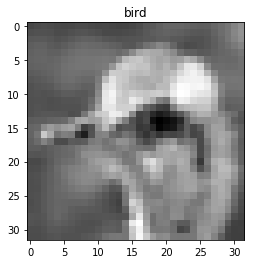

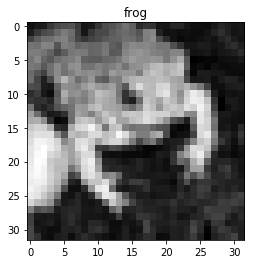

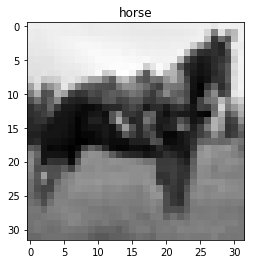

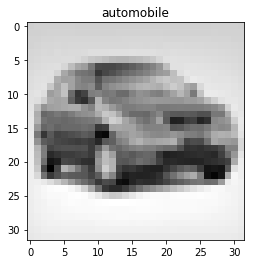

In [25]:
rand_indices = np.random.randint(1,len(X_train), size=4)
for i, ix in enumerate(rand_indices):
    plt.figure(i)
    plt.imshow(X_train[ix].reshape(32, 32), cmap='gray')
    plt.title(number_to_word(y_train[ix]))
    plt.draw()

Looks fine to me.

Ok, let's see if we can apply k-nearest neighbors to our dataset.

In [26]:
clf = neighbors.KNeighborsClassifier(n_neighbors, n_jobs=-1)
clf.fit(X_train, y_train)
Z = clf.predict(X_test[:1000])

Ok, let's look at what that k-nearest neighbors thinks

In [27]:
Z

array([8, 8, 8, 6, 5, 2, 8, 8, 4, 5, 8, 2, 8, 4, 9, 6, 2, 6, 4, 2, 8, 3, 3,
       0, 4, 4, 2, 3, 4, 8, 4, 0, 2, 0, 2, 8, 0, 8, 4, 2, 2, 4, 0, 1, 8, 0,
       8, 6, 4, 5, 9, 0, 9, 8, 4, 0, 8, 4, 4, 3, 8, 2, 4, 8, 4, 4, 2, 1, 8,
       0, 0, 5, 4, 0, 8, 4, 4, 3, 1, 2, 8, 2, 8, 0, 5, 0, 8, 2, 4, 2, 8, 3,
       4, 2, 4, 6, 8, 2, 8, 6, 2, 0, 2, 8, 7, 6, 0, 3, 0, 3, 6, 4, 3, 2, 4,
       5, 2, 8, 4, 2, 8, 8, 2, 8, 4, 2, 9, 2, 0, 6, 8, 4, 6, 0, 1, 4, 4, 4,
       0, 2, 0, 8, 4, 5, 5, 4, 4, 4, 4, 2, 4, 8, 4, 4, 2, 4, 4, 7, 8, 8, 2,
       5, 4, 8, 0, 2, 4, 4, 3, 4, 0, 2, 8, 8, 2, 4, 5, 8, 8, 8, 4, 4, 4, 7,
       8, 1, 8, 2, 5, 7, 0, 2, 1, 5, 8, 2, 0, 4, 9, 6, 2, 8, 7, 8, 2, 8, 4,
       3, 4, 6, 3, 7, 0, 4, 0, 0, 8, 8, 4, 8, 4, 2, 4, 8, 8, 3, 0, 9, 4, 2,
       2, 4, 2, 2, 3, 2, 5, 4, 4, 7, 4, 0, 7, 2, 8, 0, 7, 2, 2, 4, 2, 7, 8,
       2, 8, 4, 8, 8, 2, 8, 3, 8, 4, 4, 2, 4, 4, 8, 0, 4, 8, 4, 8, 4, 4, 4,
       7, 0, 4, 0, 1, 8, 2, 8, 7, 4, 0, 8, 4, 0, 4, 2, 5, 0, 8, 4, 4, 4, 8,
       3, 3,

Let's check out how many of these predictions match up with the actual truth.

In [28]:
sum(Z == y_test[:1000])/1000

0.25600000000000001

Not too bad for 3 lines of code :) If this was random chance, we would have expected something like 0.10 (since there are 10 classes and each example would have had an equal chance of being classified as any of them.)

Let's try our hand at linear regression. Here is the inbuilt Boston dataset with linear regression ran over it.

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


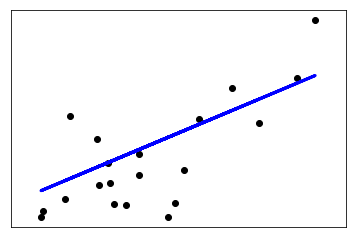

In [47]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Back to Logistic Regression. We will leave looking at how logistic regression works on CIFAR-10 to you. For now, let's see how it works on Iris.

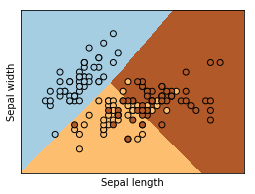

In [34]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Wait, but we only ever talked about logistic regression in the case of two classess... how is this happening then?

There are two ways of dealing with the situation where we might have more than 2 classes:

* One vs. Rest (OVR):
        For this approach in the above example, we will actually train 3 classifiers:
        
        * blue vs orange and red
        * orange vs blue and red
        * red vs blue and orange
        
        So for example, if the orange vs blue and red classifier has the largest confidence, we will output orange.
        
* One vs One (OVO):
        For this approach in the example above, we will train 3 classifiers:
        
        * red vs orange
        * orange vs blue
        * red vs blue
        
        We can average out the confidence for, say, orange in the orange vs blue and orange vs red classifiers,
        and the color with the highest average confidence shall win

What are the possible advantages for each?



training score : 0.995 (multinomial)
training score : 0.976 (ovr)


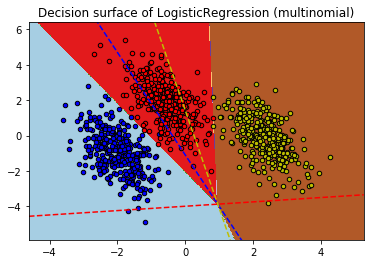

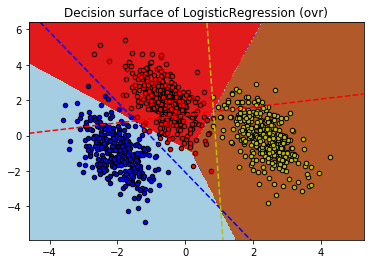

In [35]:
# Authors: Tom Dupre la Tour <tom.dupre-la-tour@m4x.org>
# License: BSD 3 clause

from sklearn.datasets import make_blobs

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                    edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

Exercise for you:

* Try k nearest neighbors for cifar-10.
* Try logistic regression for cifar-10.
        * This will probably be too slow.
* Read up about SGDClassifier and about PCA. We will be talking about these soon, so you should try them out. These will be speeding up our tasks a lot in the near future.